In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statistics as st
from tqdm import tqdm

In [22]:
data=pd.read_csv('Data analyst Task.csv')
data.drop([0,1,2,3,4],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)
created_at=[]
for item in data.created_at:
    created_at.append(datetime.date(int(item[-4:]),int(item[0]),int(item[2:-5])))
data['created_at']=created_at
data

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,6,6,2022-01-01,0,NaN,10000
1,7,7,2022-01-01,0,NaN,29500
2,8,8,2022-01-01,10000,1.0,10000
3,9,9,2022-01-01,0,NaN,5000
4,10,10,2022-01-01,0,NaN,35000
...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,NaN,18000
29048,29054,9985,2022-07-31,0,NaN,25000
29049,29055,8843,2022-07-31,6000,1.0,24000
29050,29056,8703,2022-07-31,0,NaN,40000


# number of orders per months

In [40]:
months=[item.month for item in data.created_at]
months_orders=[months.count(item) for item in range(1,8)]
months_orders

[1999, 2915, 3132, 4713, 4479, 5419, 6395]

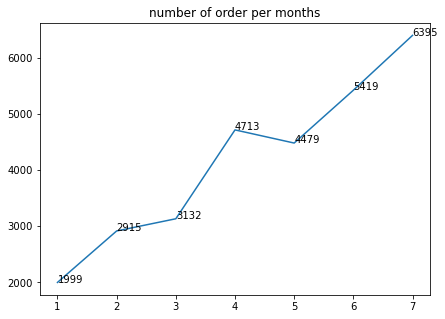

In [41]:
plt.figure(figsize=(7,5))
plt.plot(months_orders)
plt.title('number of order per months')
plt.xticks(ticks=range(7),labels=[1,2,3,4,5,6,7])
for i in months_orders:
    plt.text(months_orders.index(i),i,s=i)
plt.show()

# sum of baskets per months

In [49]:
months_basket=[]
for item in range(1,8):
    temp=data[data.created_at.apply(lambda row : row.month==item)]
    months_basket.append(temp.basket.sum())

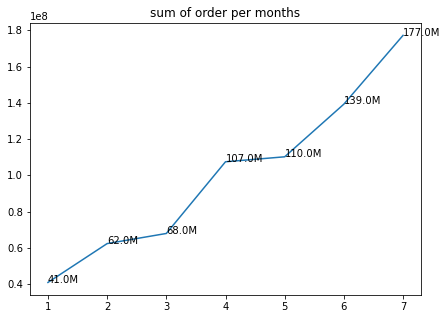

In [60]:
plt.figure(figsize=(7,5))
plt.plot(months_basket)
plt.title('sum of order per months')
plt.xticks(ticks=range(7),labels=[1,2,3,4,5,6,7])
for i in months_basket:
    plt.text(months_basket.index(i),i,s=f'{round(i,-6)/1000000}M')
plt.show()

In [70]:
from tqdm import tqdm
new_user=[]
for index in tqdm(data.index):
    user=data.user_id[index]
    temp=list(data.user_id[0:index])
    if user in temp:
        new_user.append(0)
    else:
        new_user.append(1)

100%|██████████| 29052/29052 [01:44<00:00, 277.23it/s]


In [73]:
data['new_user']=new_user
data

,order_id,user_id,created_at,discount_cost,discount_type,basket,new_user
0,6,6,2022-01-01,0,NaN,10000,1
1,7,7,2022-01-01,0,NaN,29500,1
2,8,8,2022-01-01,10000,1.0,10000,1
3,9,9,2022-01-01,0,NaN,5000,1
4,10,10,2022-01-01,0,NaN,35000,1
...,...,...,...,...,...,...,...
29047,29053,6622,2022-07-31,0,NaN,18000,0
29048,29054,9985,2022-07-31,0,NaN,25000,1
29049,29055,8843,2022-07-31,6000,1.0,24000,0
29050,29056,8703,2022-07-31,0,NaN,40000,0


In [93]:
next_orders=[]
for month in range(1,7):
    temp=data[data.created_at.apply(lambda row : row.month==month)]
    temp=temp[temp.new_user==1]
    jan_new_users=list(temp.user_id)
    temp=data[data.created_at.apply(lambda row : row.month==month+1)]
    feb_orders=[]
    for item in jan_new_users:
        feb_orders.append(list(temp.user_id).count(item))

    feb_orders_nonzeros=list(filter(lambda x: x > 0, feb_orders))
    next_orders.append(st.mean(feb_orders_nonzeros))

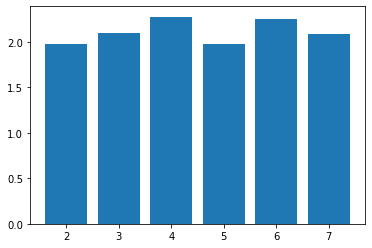

In [98]:
plt.bar(range(2,8),next_orders)
plt.show()


1.9759299781181618